In [1]:
import pandas as pd
data = pd.read_csv('datawash.csv', index_col=0)

In [2]:
print(data.shape)
data['write_time'] = pd.to_datetime(data['write_time'])
# 查看每列数据类型
data.dtypes

(51168, 9)


abstract                object
comment                  int64
favorites                int64
name                    object
title                   object
url                     object
write_time      datetime64[ns]
title_length             int64
year                     int64
dtype: object

In [3]:
# 对数值型变量进行统计分析
data.describe()

,comment,favorites,title_length,year
count,51168.000000,51168.000000,51168.000000,51168.000000
mean,10.842851,34.833744,22.656465,2015.304116
std,23.874707,49.250719,9.537370,1.954846
min,0.000000,0.000000,1.000000,2012.000000
25%,3.000000,9.000000,17.000000,2014.000000
50%,6.000000,19.000000,22.000000,2015.000000
75%,12.000000,41.000000,28.000000,2017.000000
max,2376.000000,1119.000000,224.000000,2018.000000


In [4]:
# 对非数值型变量进行统计分析
data['name'].describe()

count     51168
unique     5050
top          虎嗅
freq      10546
Name: name, dtype: object

In [5]:
data['write_time'].describe()

count                   51168
unique                   2440
top       2014-07-10 00:00:00
freq                      274
first     2012-04-03 00:00:00
last      2018-12-09 00:00:00
Name: write_time, dtype: object

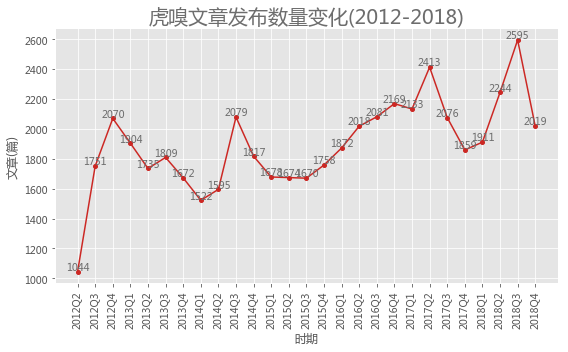

In [9]:
# 不同时期发布文章数量变化图
import numpy as np
import matplotlib.pyplot as plt
# from pylab import *

# mpl.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus']=False

plt.style.use('ggplot')
fig= plt.figure(figsize=(8,5))   # Figure dimension (width, height) in inches.
ax1 = fig.add_subplot(1,1,1)
colors = '#6D6D6D'  #设置标题颜色为灰色
color_line = '#CC2824'
fontsize_title = 20
fontsize_text = 10

def date_analysis(data):
    data.set_index(data['write_time'], inplace=True)
    data = data.resample('Q').count()['name']  # 以季度汇总
    data = data.to_period('Q')
    
    # 创建x,y轴
    x = np.arange(0, len(data), 1)
    ax1.plot(x, data.values,
            color = color_line,
            marker = 'o', markersize = 4
            )
    ax1.set_xticks(x)
    ax1.set_xticklabels(data.index)
    plt.xticks(rotation=90)
    
    for x,y in zip(x, data.values):
        plt.text(x, y+10, '%.0f' %y, ha='center', color=colors, fontsize=fontsize_text)
    
    # 设置标题
    plt.title(u'虎嗅文章发布数量变化(2012-2018)', color=colors, fontsize=fontsize_title)
    plt.xlabel(u'时期')
    plt.ylabel('文章(篇)')
    plt.tight_layout() # 自动控制空白边缘
    plt.savefig('虎嗅网文章数量发布变化.png', dpi=200)
    plt.show()

date_analysis(data)

                                                     title  favorites
year write_time                                                      
2012 2012-07-27                      产品的思路——来自腾讯张小龙的分享（全版）        191
     2012-07-25                               张小龙：微信背后的产品观        165
     2012-10-08                     Fab CEO：创办四家公司教给我的90件事        163
2013 2013-10-31                           创业者手记：我所犯的那些入门错误        473
     2013-11-15                   马化腾三小时讲话实录：千亿美金这个线，其实很恐怖        391
     2013-05-03  雕爷亲身谈：白手起家的我如何在30岁之前赚到1000万。读《MBA教不了的创富课》        354
2014 2014-03-25                                  85后，突变的一代        529
     2014-02-03           雕爷自述：什么是我做餐饮时琢磨、而大部分“外人”无法涉猎的思考？        522
     2014-11-18                  据说这 40 张PPT是蚂蚁金服的内部培训资料……        485
2015 2015-08-20                     读完这10本书，你就能站在智商鄙视链的顶端了       1119
     2015-05-29       京东打脸央视：你所谓的翻新iPhone均为正品，我们保留向警方报案的权利        867
     2015-09-02                            离职创业？先读完这22本书再说        861
2016 2016-11-25     

/home/fwj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: 'year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  if sys.path[0] == '':
/home/fwj/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:82: FutureWarning: 'year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=dropna)


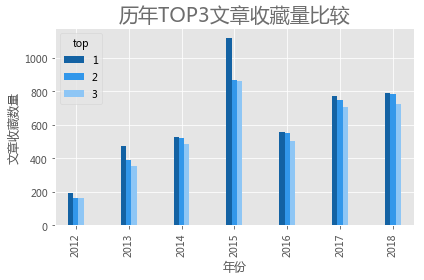

In [18]:
# 文章收藏量 TOP10
def article_analysis(data):
    # 每年收藏量前三文章
    def top_favorites(data):
        top = data.sort_values('favorites', ascending=False)
        return top[:3]
    
    data = data.groupby(by='year').apply(top_favorites)
    print(data[['title', 'favorites']])
    
    data['add'] = 1
    data['top'] = data.groupby(by='year')['add'].cumsum()
    
    data_reshape = data.pivot_table(index='year', columns='top', values='favorites').reset_index()
    data_reshape.plot(
        y=[1,2,3],
        kind='bar',
        width=0.3,
        color=['#1362A3','#3297EA','#8EC6F5']
        )
    
    years = data['year'].unique()
    plt.xticks(list(range(7)), years)
    plt.xlabel('年份')
    plt.ylabel('文章收藏数量')
    plt.title('历年TOP3文章收藏量比较', color=colors, fontsize=fontsize_title)
    plt.tight_layout() #　自动控制空白边缘，以显示ｘ轴所有名称
    plt.savefig('历年TOP3文章收藏量比较.png', dpi=200)
    plt.show()

article_analysis(data)

name
虎嗅              10546
娱乐资本论             593
Eastland          576
发条橙子              471
周超臣               438
新浪科技              434
提琴没有弦             418
界面                403
张博文               381
假装FBI             342
古泉君               338
水原瓜子              335
嘎嘣脆脆              332
mrpuppybunny      313
壹娱观察              280
孙永杰               267
钱德虎               253
翻来翻去              239
刘然                233
魏武挥               228
阑夕                225
罗超                224
网事风云              219
铁雄                216
Grace姐姐           210
Mr.Jamie          199
懂懂笔记              194
李拓                191
凤凰科技              175
普通酱               172
                ...  
卧龙阁公司解析             1
卢麒元                 1
卢梵溪                 1
睿意德RET              1
卢伟                  1
卢书成                 1
博链财经                1
参考消息网               1
友成基金会               1
皮尤                  1
史中@浅黑科技             1
皮特王新经营哲学            1
叶佳桐                 1
叶佩旭                 1
叶伟民  

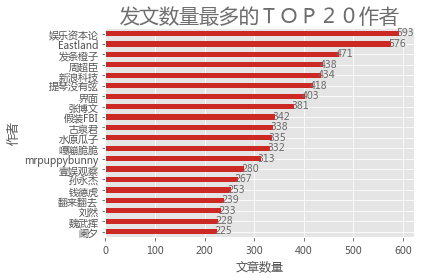

In [30]:
# 发文量TOP20作者
def author_analysis(data):
    data = data.groupby(data['name'])['title'].count()
    data = data.sort_values(ascending=False)
    print(data)
    
    data[1:21].plot(kind='barh', color=color_line).invert_yaxis()
    
    for y,x in enumerate(list(data[1:21].values)):
        plt.text(x+12, y+0.2, '%s' %round(x,1), ha='center', color=colors)
    
    plt.xlabel('文章数量')
    plt.ylabel('作者')
    plt.title('发文数量最多的ＴＯＰ２０作者', color=colors, fontsize=fontsize_title)
    plt.tight_layout()
    plt.savefig('发文数量最多的ＴＯＰ２０作者.png', dpi=200)
    plt.show()
    
author_analysis(data)

In [39]:
# 过滤发文超过至少５篇的作者，文章收藏数
def collection_analysis(data):
    data = pd.pivot_table(data, values=['favorites'], index='name', aggfunc=[np.sum, np.size])
    data['avg'] = data[('sum', 'favorites')]/data[('size', 'favorites')]
    
    data['avg'] = data['avg'].astype('int')
    
    data.columns = data.columns.get_level_values(0)
    data.columns = ['total_favorites', 'ariticls_num', 'avg_favorites']
    
    data = data.query('ariticls_num > 4')
    data = data.sort_values(by=['avg_favorites'], ascending=False)
    
    print(data.query('name == "重读"'))
    #data = data.query('name == "yang Yemeng"')
    #print(data[['title', 'favorites', 'write_time']])
    
    print(data[:20])
    print(data[-10:])
    
collection_analysis(data)

      total_favorites  ariticls_num  avg_favorites
name                                              
重读               2172             7            310
        total_favorites  ariticls_num  avg_favorites
name                                                
重读                 2172             7            310
楼台                 2507             9            278
彭萦                 2493             9            277
曹山石                1190             5            238
饭统戴老板              9265            40            231
格隆汇APP             1147             5            229
猛哥分号               1594             7            227
笔记侠                1845             9            205
辩手李慕阳             12050            63            191
李录                 2371            13            182
虎嗅口述史              1250             7            178
宁南山                3721            21            177
高晓松                 889             5            177
混子谈钱               2055            12            171

In [ ]:
# 文章评论数最多TOP10
